In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sc
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
vxx = pd.read_excel('data/worksheet_of_em_all.xlsx', sheet_name ='VXX')


In [5]:
#this sets the table to datetime with datetime
#from datetime import datetime
#vxx1 = pd.read_excel('data/worksheet_of_em_all.xlsx', sheet_name ='VXX')
#for i in np.arange(len(vxx['date'])):
    #vxx1['date'][i] = datetime.strptime(vxx1['date'][i], '%Y-%m-%d')
    #string parse time == strptime
#Contained in pandas (and cleaner looking than datetime)
dates = pd.to_datetime(vxx.date)
vxx["date"] = dates

In [6]:
#as a note, VXX doesn't pay dividends so no worries on getting its price + dividend

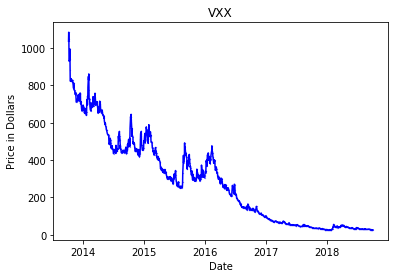

In [7]:
#let's check how shitty VXX is
#setting x, y, linte type, size, and color
plt.plot_date(vxx.date, vxx.close,  ls = 'solid', ms = .2, color = 'blue')
plt.title("VXX")
plt.xlabel("Date")
plt.ylabel("Price in Dollars")
i = 'VXX'
pchartimgfilename = ('images/' + i + '/pricechart.png')
plt.savefig(pchartimgfilename)
#savefig is so fucking lit

Text(0.5,0,'Date')

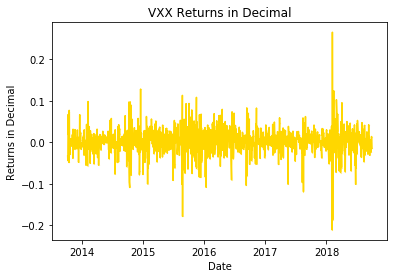

In [8]:
#making a returns column
vxx['returns'] = vxx.open/vxx.close - 1 
plt.plot_date(vxx.date, vxx.returns, ls = 'solid', ms = .15, color = 'gold')
plt.title("VXX Returns in Decimal")
plt.ylabel("Returns in Decimal")
plt.xlabel("Date")

In [9]:
#sorting returns, dropping/resetting the index for merging purposes
vxx_sorted_returns = vxx['returns'].sort_values().reset_index(drop = True)
vxx_sorted_returns[0]

-0.21165225307237134

In [10]:
#assuming that our sample can essentially encapsualte all, and each return is just as likely as another
#add one to account for n-1 type thing
vxx_cdf = (np.arange(len(vxx_sorted_returns)) +1)/len(vxx_sorted_returns)
(np.arange(len(vxx_sorted_returns)) +1)

array([   1,    2,    3, ..., 1254, 1255, 1256])

In [11]:
#ordering the probability of particular return
#if statment catagorizes the probability (essentially)
vxx_true_cdf = []
for i in np.arange(len(vxx_cdf)):
    if vxx_sorted_returns[i] <= 0:
        vxx_true_cdf += [vxx_cdf[i]]
        if i == 0:
            vxx_true_cdf[i] = vxx_true_cdf[i]/2
    else: 
        vxx_true_cdf += [1-vxx_cdf[i]]
        if vxx_true_cdf[i] == 0:
            #there is some non zero that the edge case, or final point is chosen
            #i.e. the value of it's true cdf != 1-1
            #so I'm setting it as equal probability to the farr left one (which was divided by two)
            vxx_true_cdf[i] = vxx_true_cdf[0]

        
        
vxx_distributed_returns = pd.DataFrame({'returns': vxx_sorted_returns,
                                       'true_cdf': vxx_true_cdf})
vxx_distributed_returns.tail(5)

,returns,true_cdf
1251,0.108354,0.003185
1252,0.113161,0.002389
1253,0.124232,0.001592
1254,0.128337,0.000796
1255,0.265625,0.000398


Text(0.5,0,'Returns')

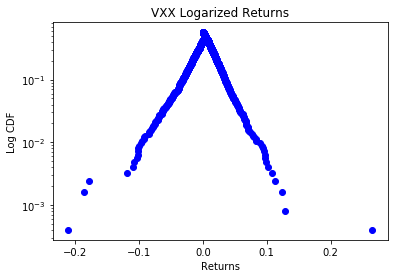

In [12]:
#plotting the values of returns
plt.plot??
plt.plot(vxx_distributed_returns.returns, vxx_distributed_returns.true_cdf, 'bo')
plt.yscale('log')
plt.title('VXX Logarized Returns')
plt.ylabel('Log CDF')
plt.xlabel('Returns')

In [13]:
#october 10th
chance_above_10_pct = vxx_distributed_returns[vxx_distributed_returns['returns'] > .10]

3.0


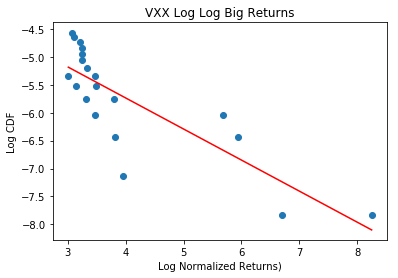

In [24]:

vxx_norm = (vxx_distributed_returns.returns - np.mean(vxx_distributed_returns.returns))/np.std(vxx_distributed_returns.returns)
abover = 3*np.std(vxx_norm)
print(abover)
vxx_norm_above = abs(vxx_norm[abs(vxx_norm) > abover])
vxx_log_return = np.log(vxx_distributed_returns.true_cdf)
vxx_log_above =  vxx_log_return[abs(vxx_norm) > abover]
###vxx_norm_above == t_norm_x, vxx_log_above == dvariable (this all references earlier code)
plt.scatter(vxx_norm_above, vxx_log_above)
plt.title("VXX Log Log Big Returns")
plt.xlabel("Log Normalized Returns)")
plt.ylabel("Log CDF")
plt.plot(np.unique(vxx_norm_above), np.poly1d(np.polyfit(vxx_norm_above, vxx_log_above, 1))(np.unique(vxx_norm_above)), color = 'red')